In [18]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv("q3-train.csv")
df_test = pd.read_csv("q3-test.csv")

In [3]:
df_train

,Feature1,Feature2,Label
0,1.688537,-0.250010,1
1,0.569210,0.107141,1
2,-0.640956,0.884289,0
3,0.233581,-0.036524,1
4,-0.581355,0.867544,0
...,...,...,...
795,0.916481,0.474403,0
796,-0.093044,0.315689,1
797,0.297474,0.883899,0
798,0.584925,-0.200526,1


In [7]:
X_train = df_train.drop(columns="Label")
y_train = df_train.Label

In [10]:
X_test = df_test.drop(columns="Label")
y_test = df_test.Label

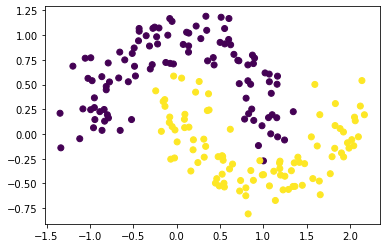

In [31]:
plt.scatter(X_test.Feature1, X_test.Feature2, c=y_test) 

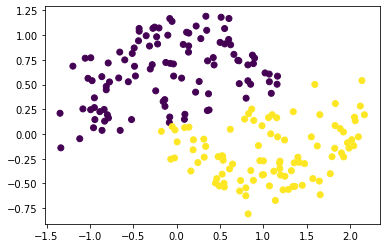

In [32]:
l_model = LogisticRegression()
l_model.fit(X_train, y_train)
l_model.score(X_test, y_test)

plt.scatter(X_test.Feature1, X_test.Feature2, c=l_model.predict(X_test)) 

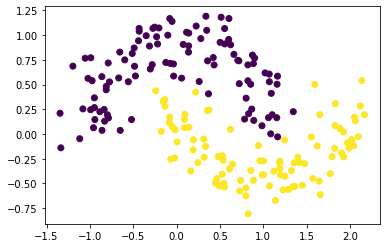

In [33]:
svm = SVC()
svm.fit(X_train, y_train)
print(svm.score(X_test, y_test))

plt.scatter(X_test.Feature1, X_test.Feature2, c=svm.predict(X_test)) 

9

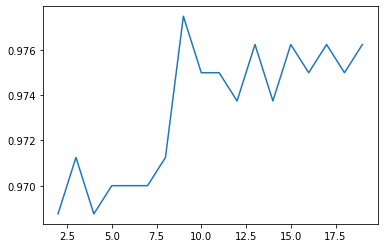

In [29]:
k_values = list(range(2, 20))
costs = []
for k in k_values:
    model = KNeighborsClassifier(k)
    costs.append(cross_val_score(model, X_train, y_train, cv=10).mean())
    
plt.plot(k_values, costs)
    
k_values[costs.index(max(costs))]

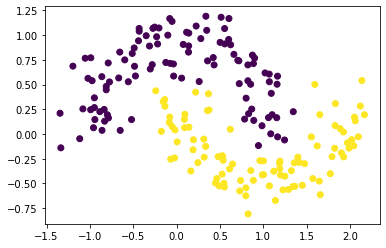

In [34]:
knn = KNeighborsClassifier(9)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

plt.scatter(X_test.Feature1, X_test.Feature2, c=knn.predict(X_test)) 

[0.8525,
 0.9274999999999999,
 0.9274999999999999,
 0.9262499999999999,
 0.9649999999999999,
 0.9650000000000001,
 0.9662499999999999,
 0.9650000000000001,
 0.96125,
 0.9637499999999999,
 0.9650000000000001,
 0.9650000000000001,
 0.9625,
 0.9662500000000002,
 0.9662499999999999,
 0.9650000000000001,
 0.9637499999999999,
 0.9650000000000001,
 0.9662499999999999,
 0.9675,
 0.9650000000000001,
 0.9637499999999999,
 0.9662500000000002,
 0.9650000000000001,
 0.9650000000000001,
 0.9674999999999999,
 0.9662499999999999,
 0.9662499999999999,
 0.9662500000000002,
 0.9637499999999999,
 0.9662500000000002,
 0.9637499999999999,
 0.9674999999999999,
 0.9650000000000001,
 0.9650000000000001,
 0.9675,
 0.9675,
 0.9662499999999999,
 0.9662499999999999,
 0.9662499999999999,
 0.9650000000000001,
 0.9650000000000001,
 0.9650000000000001,
 0.9675,
 0.9637499999999999,
 0.9662499999999999,
 0.9650000000000001,
 0.9650000000000001,
 0.9650000000000001]

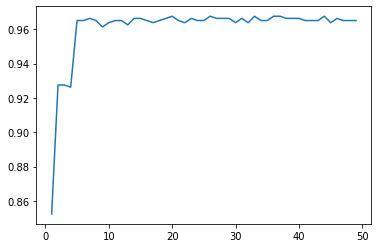

In [45]:
depths = list(range(1,50))
costs = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth)
    costs.append(cross_val_score(model, X_train, y_train, cv=10).mean())
    
plt.plot(depths, costs)
    
depths[costs.index(max(costs))]    

costs

0.955


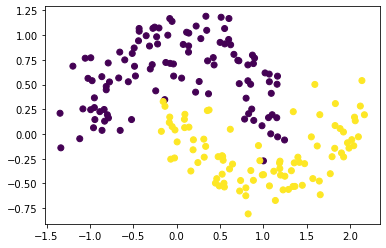

In [54]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
print(tree.score(X_test, y_test))

plt.scatter(X_test.Feature1, X_test.Feature2, c=tree.predict(X_test)) 

0.99


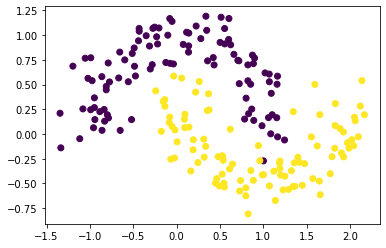

In [52]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
print(ada.score(X_test, y_test))

plt.scatter(X_test.Feature1, X_test.Feature2, c=ada.predict(X_test))